In [1]:
# importing necessary libraries for future analysis of dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [2]:
airbnb = pd.read_csv('/Users/syy19/AB_NYC_2019.csv')
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
# checking amount of rows in given dataset to understand the size we are working with
len(airbnb)

48895

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# removing the duplicates if any
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace = True)

In [7]:
# looking to find out what columns have null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis = 1, inplace = True)

# replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace = True)

airbnb.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [9]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
# examining the unique values of n_group
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

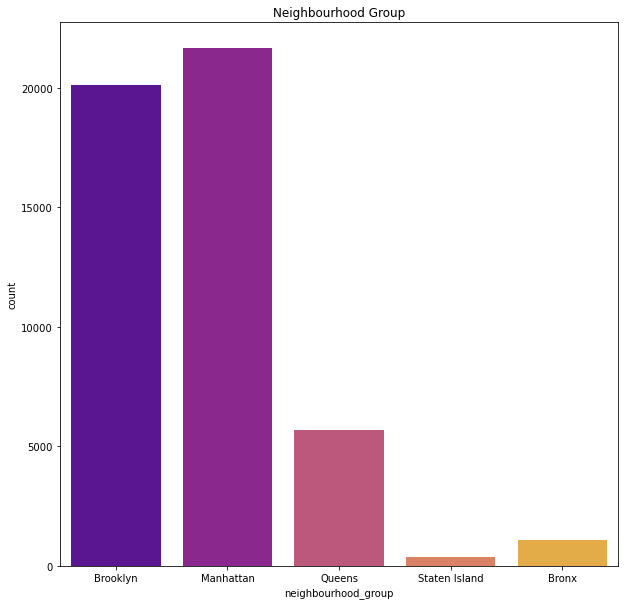

In [11]:
sns.countplot(airbnb['neighbourhood_group'], palette = 'plasma')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Neighbourhood Group')

In [12]:
# examining the unique values of neighbourhood
len(airbnb.neighbourhood.unique())

221

Text(0.5, 1.0, 'Neighbourhood')

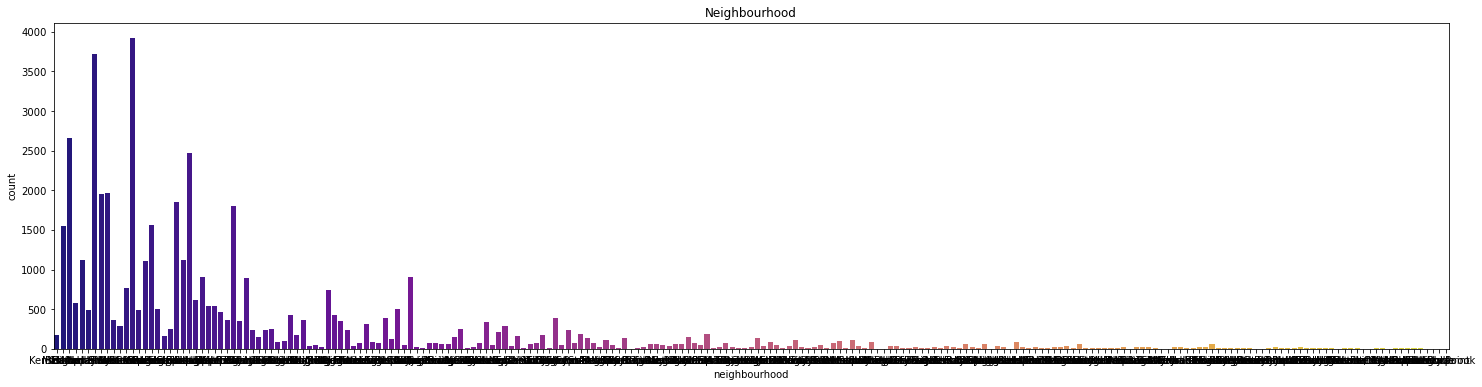

In [13]:
sns.countplot(airbnb['neighbourhood'], palette = 'plasma')
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

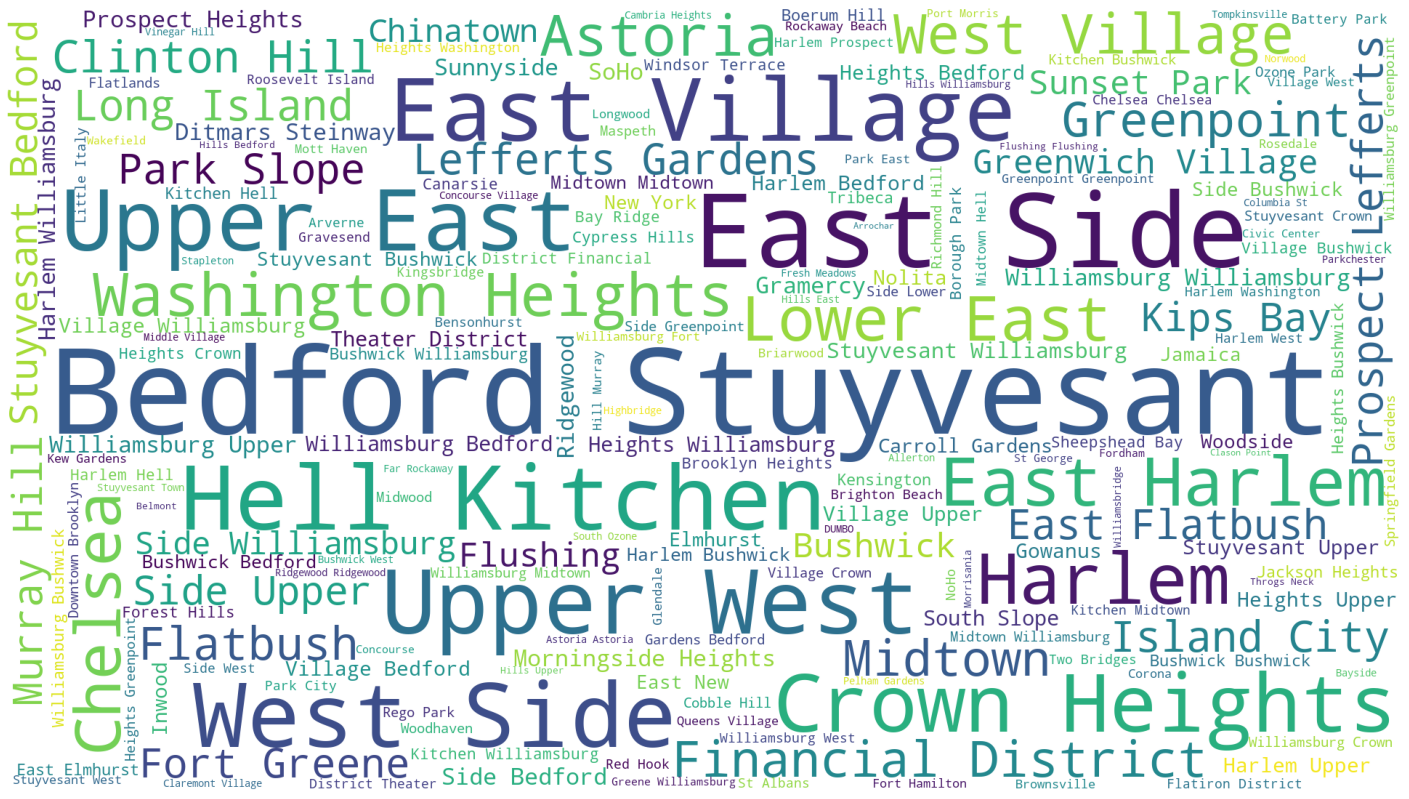

In [14]:
# wordcloud
plt.subplots(figsize = (25, 15))
wordcloud = WordCloud(background_color = 'white', width = 1920, height = 1080).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [15]:
# examining the unique values of room_type
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Room Type')

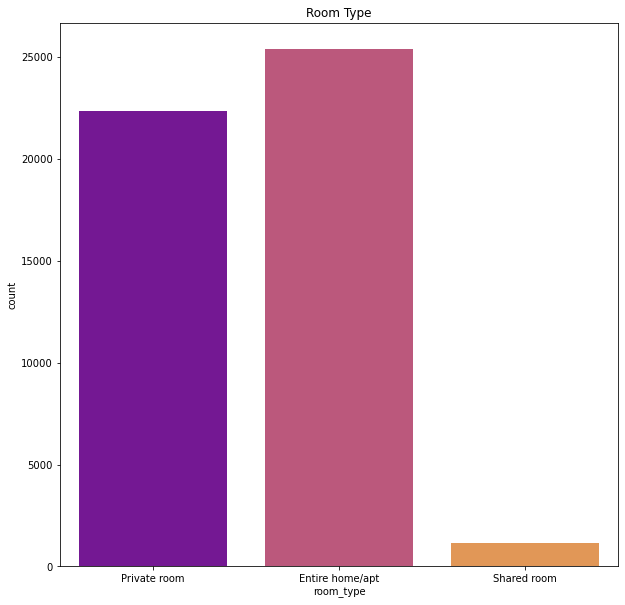

In [16]:
sns.countplot(airbnb['room_type'], palette = 'plasma')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Room Type')

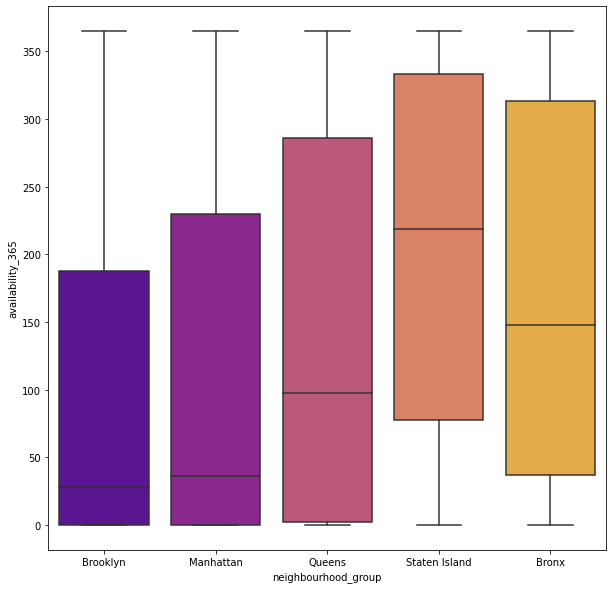

In [17]:
# relation between neighbourgroup and availability of room
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data = airbnb, x = 'neighbourhood_group', y = 'availability_365', palette = 'plasma')

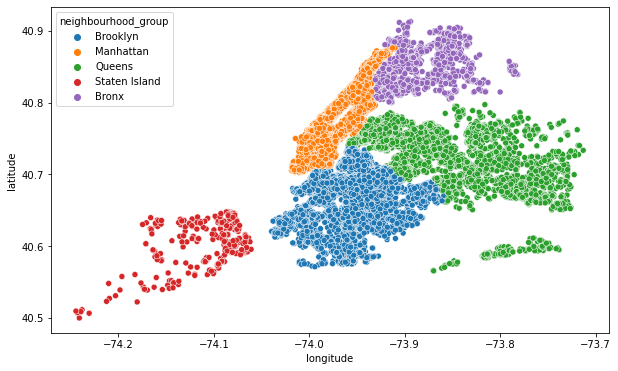

In [18]:
# map of neighbourhood group
plt.figure(figsize = (10, 6))
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue = airbnb.neighbourhood_group)
plt.ioff()

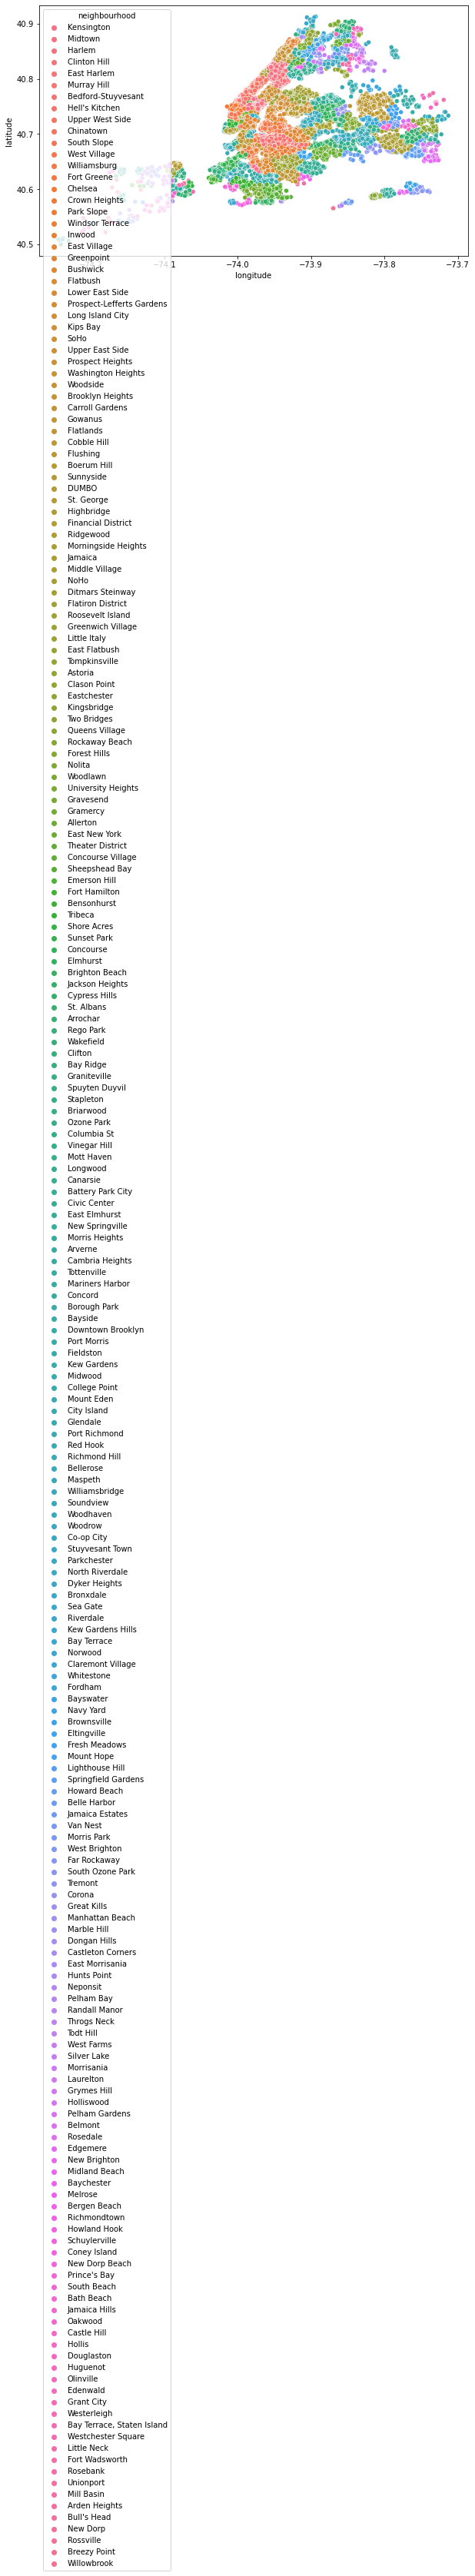

In [19]:
# map of neighbourhood
plt.figure(figsize = (10, 6))
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue = airbnb.neighbourhood)
plt.ioff()

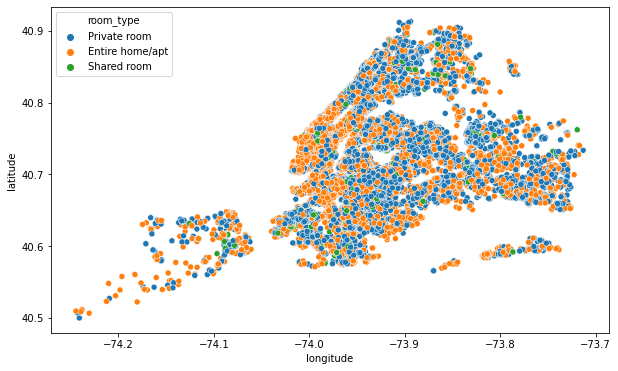

In [20]:
plt.figure(figsize = (10, 6))
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue = airbnb.room_type)
plt.ioff()

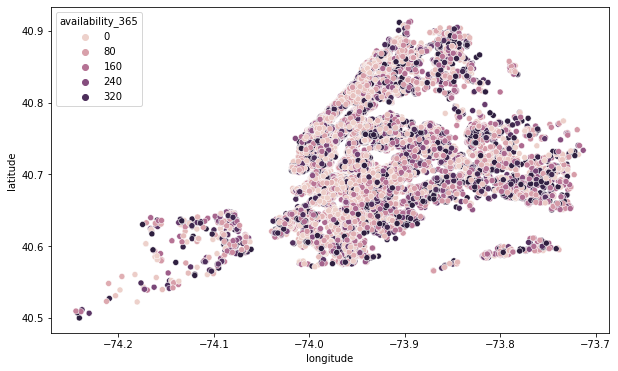

In [21]:
# availability of room
plt.figure(figsize = (10, 6))
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue = airbnb.availability_365)
plt.ioff()

In [22]:
# what hosts have the most listings on Airbnb platform
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [23]:
top_host_check = airbnb.calculated_host_listings_count.max()
top_host_check

327

In [1]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.set_style('white')

NameError: name 'sns' is not defined

In [25]:
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns = {'index':'Host_ID','host_id':'P_Count'},inplace = True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

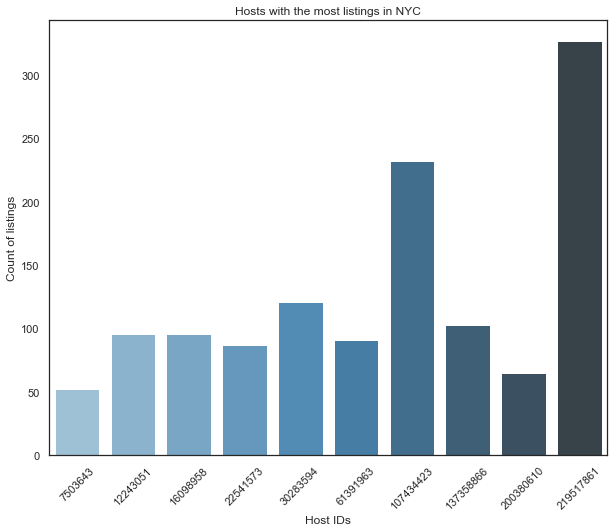

In [26]:
viz_1 = sns.barplot(x="Host_ID", y = "P_Count", data = top_host_df, palette = 'Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation = 45)

In [27]:
# find out more about our neighbouhood

# Brooklyn
sub_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1 = sub_1[['price']]
# Manhattan
sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2 = sub_2[['price']]
# Queens
sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3 = sub_3[['price']]
# Staten Island
sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4 = sub_4[['price']]
# Bronx
sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5 = sub_5[['price']]
# Staten Island

#putting all the prices' dfs in the list
price_list_by_n = [price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [28]:
p_1_b_n_2 = []
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

for x in price_list_by_n:
    i = x.describe(percentiles = [.25,.50,.75])
    i = i.iloc[3:]
    i.reset_index(inplace = True)
    i.rename(columns = {'index':'Stats'}, inplace = True)
    p_1_b_n_2.append(i)

In [29]:
p_1_b_n_2[0].rename(columns = {'price':nei_list[0]},inplace = True)
p_1_b_n_2[1].rename(columns = {'price':nei_list[1]},inplace = True)
p_1_b_n_2[2].rename(columns = {'price':nei_list[2]},inplace = True)
p_1_b_n_2[3].rename(columns = {'price':nei_list[3]},inplace = True)
p_1_b_n_2[4].rename(columns = {'price':nei_list[4]},inplace = True)

In [30]:
stat_df = p_1_b_n_2
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Densit and distribution of prices for each neighbourhood_group')

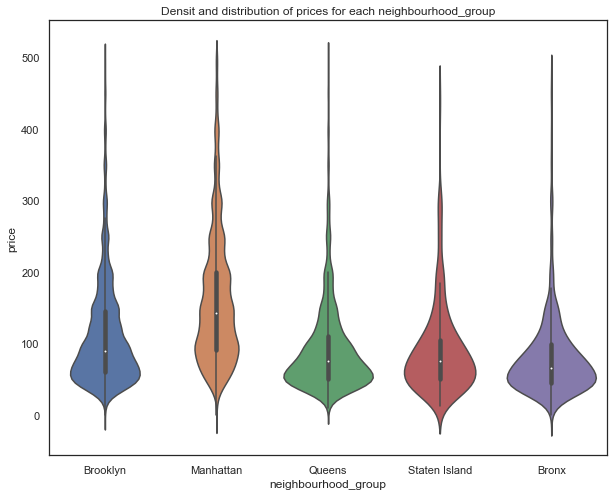

In [31]:
# Remove outlier
sub_6 = airbnb[airbnb.price < 500]

# using violinplot to showcase density and distribution of prices
viz_2 = sns.violinplot(data = sub_6, x = 'neighbourhood_group', y = 'price')
viz_2.set_title('Densit and distribution of prices for each neighbourhood_group')

In [32]:
# finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

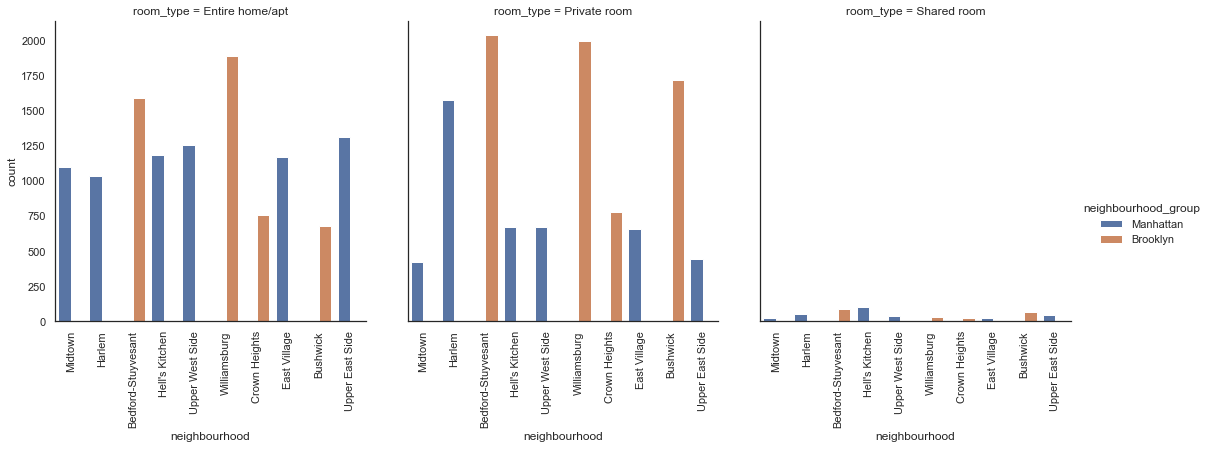

In [33]:
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

# using catplot to represent multiple interesting attributes
viz_3 = sns.catplot(x ='neighbourhood', hue ='neighbourhood_group', col = 'room_type', data = sub_7, kind = 'count')
viz_3.set_xticklabels(rotation = 90)

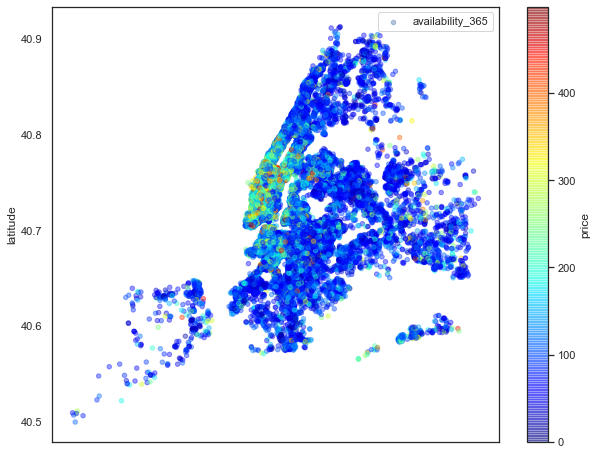

In [34]:
# scatterplot using longtitude and latitude columns
viz_4 = sub_6.plot(kind = 'scatter', x = 'longitude', y = 'latitude', label = 'availability_365', c = 'price', cmap = plt.get_cmap('jet'), colorbar = True, alpha = 0.4, figsize = (10,8))
viz_4.legend()

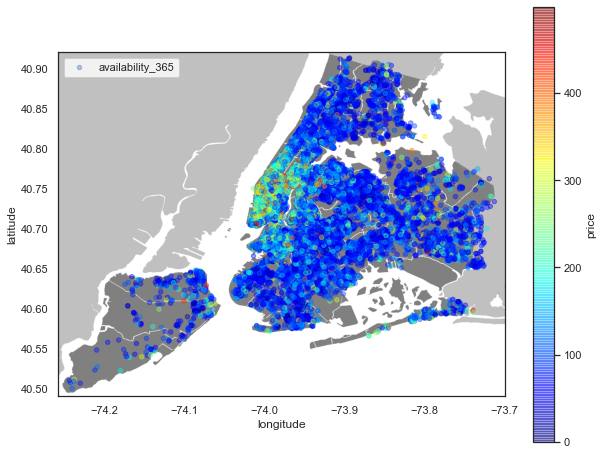

In [35]:
import urllib
import certifi
import ssl
from PIL import Image

# initializing the figure size
plt.figure(figsize = (10,8))
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG', context = ssl.create_default_context(cafile = certifi.where()))
nyc_img = Image.open(i)

# scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img, zorder = 0, extent = [-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

# using scatterplot again
sub_6.plot(kind = 'scatter', x = 'longitude', y = 'latitude', label = 'availability_365', c = 'price', ax = ax, cmap = plt.get_cmap('jet'), colorbar = True, alpha = 0.4, zorder = 5)

plt.legend()
plt.show()

In [36]:
# initializing empty list where we are going to put our name strings
_names_ = []

# getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)

# setting a function that will split those name strings into separate words
def split_name(name):
    spl = str(name).split()
    return spl

# initializing empty list where we are going to have words counted
_names_for_count_ = []

# getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word = word.lower()
        _names_for_count_.append(word)

In [37]:
from collections import Counter

# top 25 used words by host to name their listing
_top_25_w = Counter(_names_for_count_).most_common()
_top_25_w = _top_25_w[0:25]
_top_25_w

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293)]

In [38]:
# put our findings in dataframe for further visualizations
sub_w = pd.DataFrame(_top_25_w)
sub_w.rename(columns = {0:'Words', 1:'Count'}, inplace = True)

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

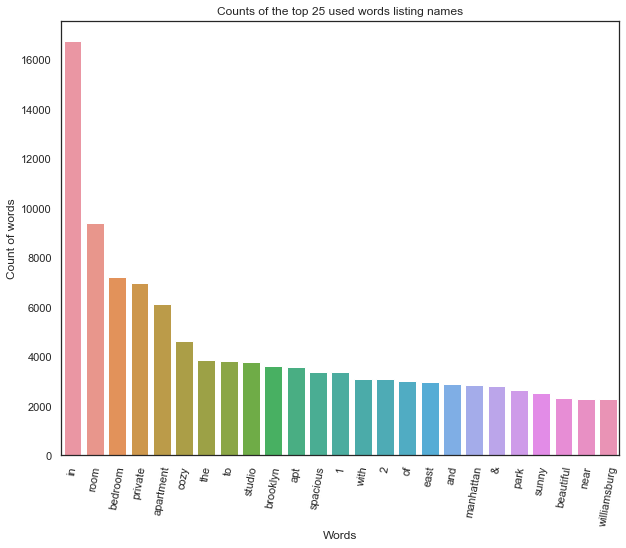

In [39]:
# use barplot for visualization
viz_5 = sns.barplot(x = 'Words', y = 'Count', data = sub_w)
viz_5.set_title('Counts of the top 25 used words listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation = 80)

In [40]:
# grab 10 most reviewed listings in NYC
top_reviewed_listings = airbnb.nlargest(10, 'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [41]:
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night:{}'.format(price_avrg))

Average price per night:65.4


In [42]:
airbnb.drop(['name'], axis = 1, inplace = True)

In [43]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

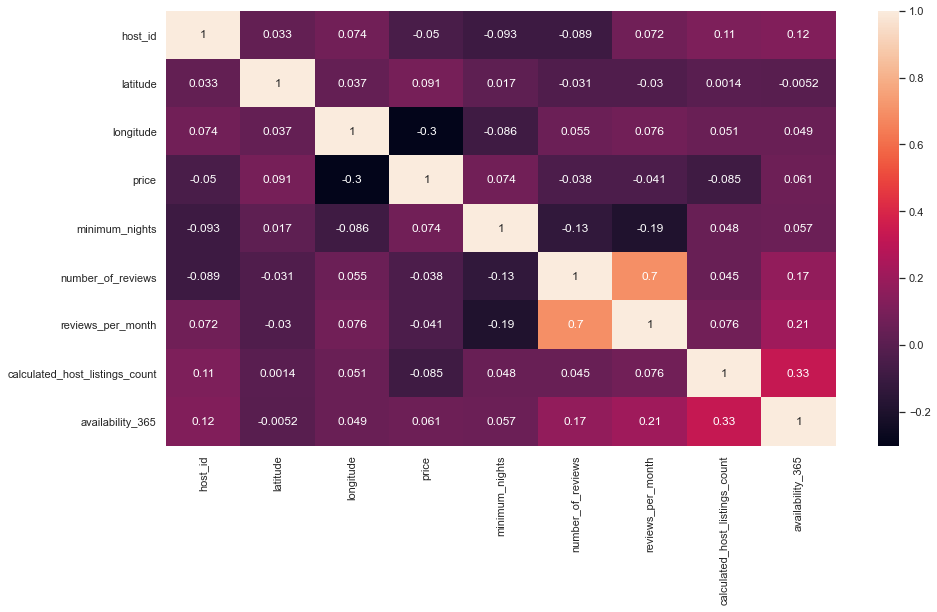

In [44]:
corr = airbnb.corr(method = 'kendall')
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)
airbnb.columns

In [45]:
airbnb.shape

(48895, 12)

In [46]:
# Regression Analysis
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis = 1, inplace = True)
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [47]:
# encode the input variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group','room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [49]:
airbnb_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

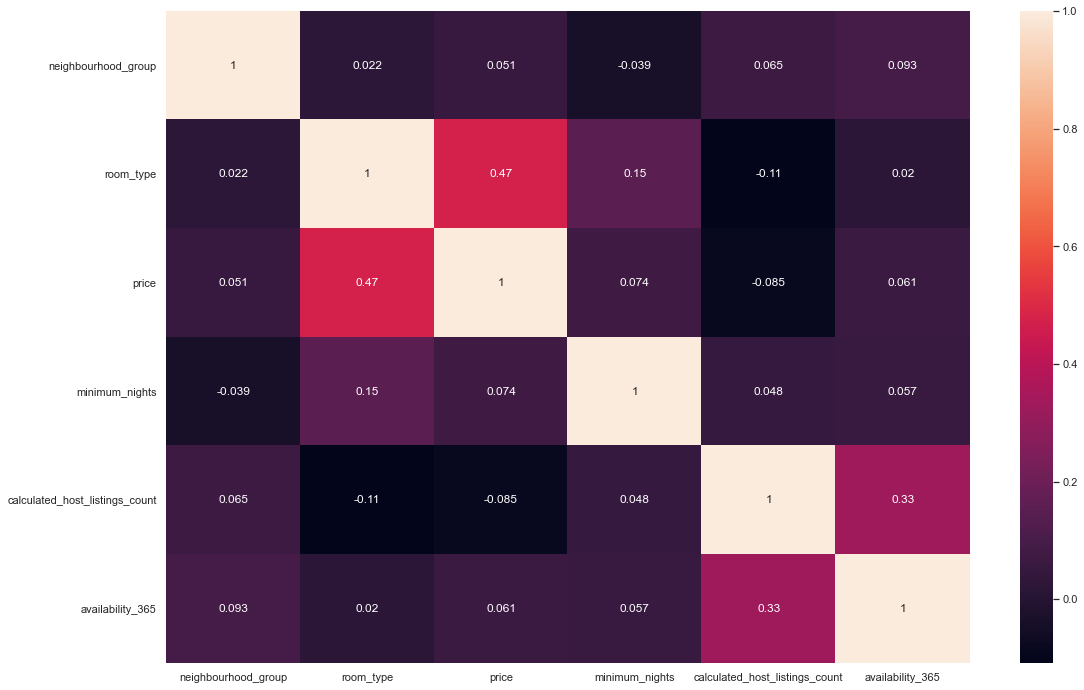

In [50]:
# get correlation between different variables
corr = airbnb_en.corr(method = 'kendall')
plt.figure(figsize = (18, 12))
sns.heatmap(corr, annot = True)
airbnb_en.columns

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [52]:
# defining the independent variables and dependent variablies
x = airbnb_en.iloc[:, [0,1,3,4,5]]
y = airbnb_en['price']
# getting test and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1, random_state = 353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [53]:
x_train.shape

(44005, 5)

In [54]:
# preparing a Linear Regression Model
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.07480306392848735

In [60]:
# preparing a Decision Tree Regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1, random_state = 105)
DTree = DecisionTreeRegressor(min_samples_leaf = .0001)
DTree.fit(x_train, y_train)
y_predict = DTree.predict(x_test)
r2_score(y_test, y_pred)

-0.03618415185264867